In [2]:
from IPython.display import Latex
Latex(filename="../notation.tex")

<IPython.core.display.Latex object>

# Convolutional Neural-Networks

## Computer Vision Basics

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import numpy as np

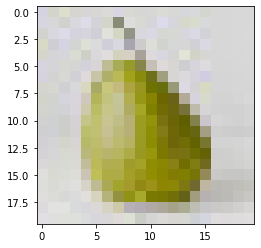

In [2]:
img = mpimg.imread('./assets/pear-color.jpg')
plt.imshow(img)

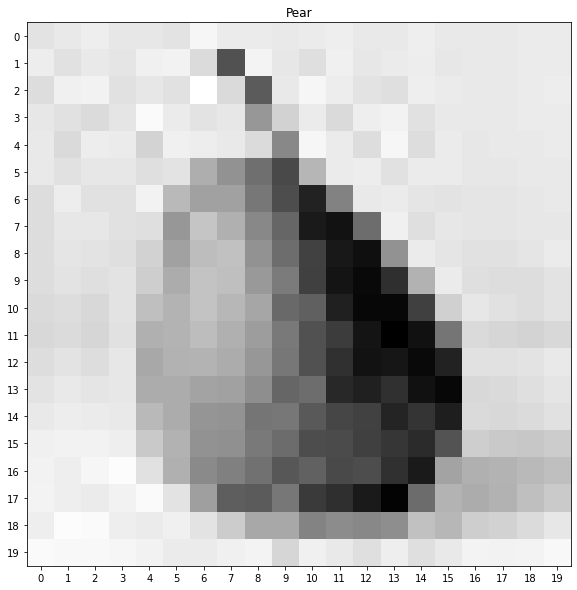

In [3]:
figure = plt.figure(figsize=(10, 10))
img = mpimg.imread('./assets/pear-bw.jpg')
plt.title("Pear")
plt.xticks(np.arange(len(img)))
plt.yticks(np.arange(len(img)))
plt.imshow(img, cmap='gray')

In [4]:
def showPixelValue(image, title = "Image", alpha = 1, threshold= 127):
    """
    Displays the value of each pixel in an image
    
    
    :param image: 2D array of a gray scale image
    :param title: Image title
    :param alpha: Output image alpha
    :param threshold: Pixel color black or white threshold

    """
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray', alpha=alpha)
    plt.title(title)

    plt.xticks(np.arange(len(image)))
    plt.yticks(np.arange(len(image)))

    for i, j in itertools.product(range(image.shape[0]), range(image.shape[1])):
        if alpha == 0:
            color = "black"
        else:
            color = "black" if image[i, j] > threshold else "white"
        plt.text(j, i, image[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()

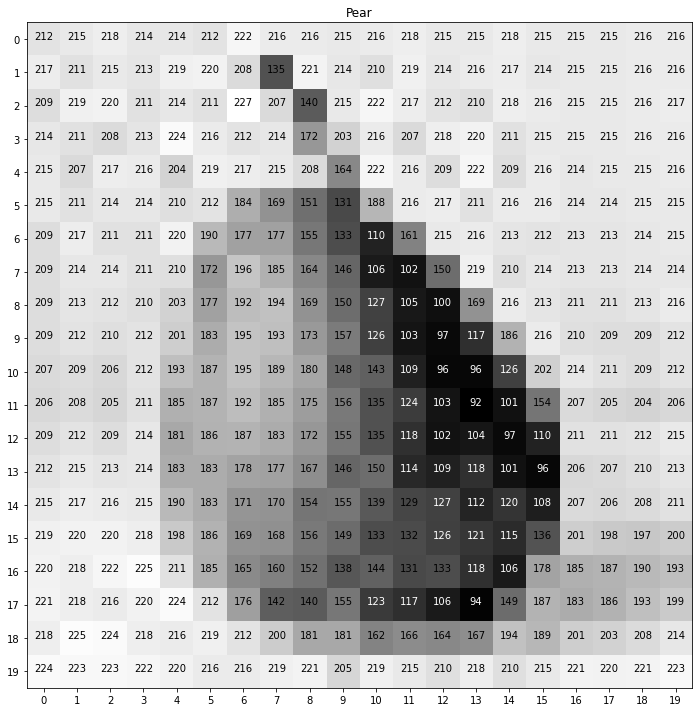

In [5]:
showPixelValue(img, "Pear")

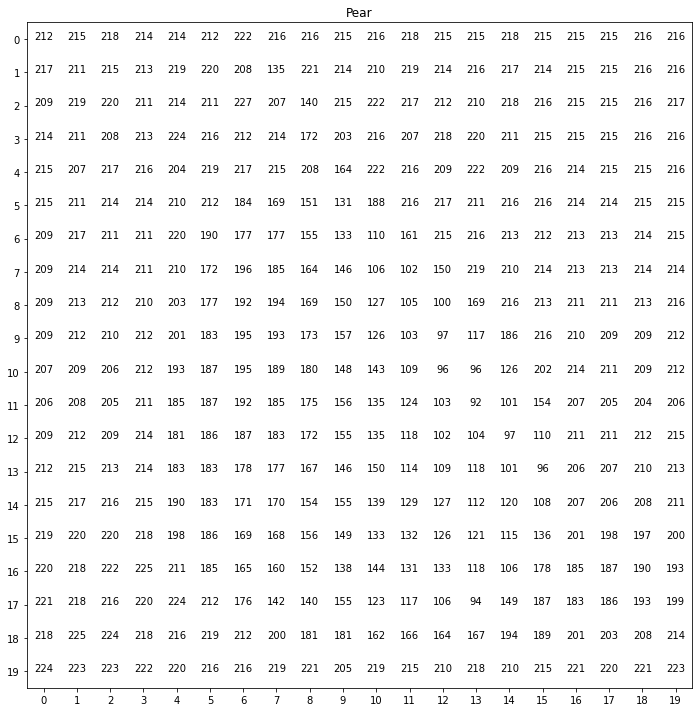

In [6]:
showPixelValue(img, "Pear", 0)

## High Level Feautures Detection

<center><img src="./assets/high-level-feature-detection.svg"></center>

## Challenges: Features Extraction

### Viewpoint variation

<center><img src="./assets/viewpoint.jpg"></center>

### Illumination conditions

<center><img src="./assets/illumination.jpg"></center>

### Scale variation

<center><img src="./assets/scale.jpg"></center>

### Deformation

<center><img src="./assets/deformation.jpg"></center>

### Background clutter


<center><img src="./assets/background-clutter.jpg"></center>

### Occlusion

<center><img src="./assets/occlusion.jpg"></center>

### Intra-class variation

<center><img src="./assets/intra-class-variation.jpg"></center>

## Fully Connected Neural Network

**Fuly Connected**:

- Connect neuron in hidden layer to all neurons in input layer
- **No spacial information!**
- Many to many parameters

How can we use **spacial structure** in the input to inform the architecture of the network?

## Using Spatial Structure

**Input:** 2D image, array of pixel values

**Idea:** Connect patches of input to neurons in hidden layer.

<center><img src="./assets/spatial-information.svg"></center>

## Spatial Structure with Convolution

- Filter of $5x5$
- Appply this same filter to $5x5$ patches in input
- Shift by 3 pixels for next patch

<center><img src="./assets/convolution.svg"></center>


## Kernels

### Blur

$
\begin{bmatrix}
1 && 1 && 1 \\
1 && 1 && 1 \\
1 && 1 && 1
\end{bmatrix}
$

<img src="./assets/convolved-blur-pear.svg">

### Sharpen

$
\begin{bmatrix}
0 && -1 && 0 \\
-1 && 5 && -1 \\
0 && -1 && 0
\end{bmatrix}
$

<img src="./assets/convolved-sharpen-pear.svg">

### Edge

$
\begin{bmatrix}
-1 && -1 && -1 \\
-1 && 8 && -1 \\
-1 && -1 && -1
\end{bmatrix}
$

<img src="./assets/convolved-edge-pear.svg">

### Darken

$
\begin{bmatrix}
0 && 0 && 0 \\
0 && 0.5 && 0 \\
0 && 0 && 0
\end{bmatrix}
$

<img src="./assets/convolved-darken-pear.svg">

[Kernels (image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Details)

## Convolution Operation

<center><img src="./assets/convolution-example.svg"></center>

> **The convolution operation in some literatures is represented by $*$, but we will represent it with $\circledast$ to avoid confusion with the multiplication operator.**

<center><img src="./assets/convolution-proc.gif"></center>

In [7]:
def conv2D(image, kernel):
    """
    "Valid" 2D convolution implementation, for illustrative purposes.
    default: shift by 1 pixel for each patch
    """
    
    img_h, img_w = image.shape
    
    kernel_h, kernel_w = kernel.shape
    img_out_h = img_h - kernel_h + 1
    img_out_w = img_w - kernel_w + 1
    
    img_conv = np.zeros((img_out_h, img_out_w))

    for x in range(img_out_h):  # Loop over every pixel of the image
        for y in range(img_out_w):
            img_conv[y, x] = np.sum(np.multiply(kernel, image[y:y + kernel_h, x:x + kernel_w]))
    
    return img_conv

### Blur

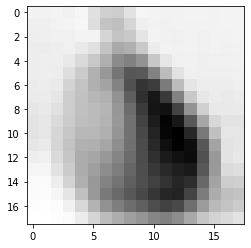

In [8]:
blur_kernel = np.ones((3,3))
img_conv = conv2D(img, blur_kernel)

#showPixelValue(img_conv, "Convolved Pear (Kernel: Box Blur)", threshold = 160)
plt.imshow(img_conv, cmap='gray')

### Sharpen

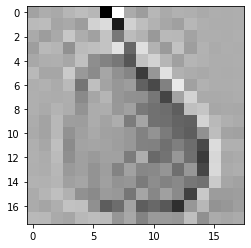

In [9]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

img_conv = conv2D(img, sharpen_kernel)
plt.imshow(img_conv, cmap='gray')

### Edge

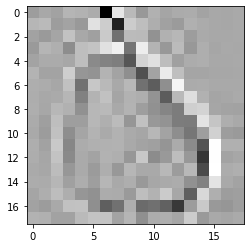

In [10]:
edge_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

img_conv = conv2D(img, edge_kernel)
plt.imshow(img_conv, cmap='gray')

### Darken

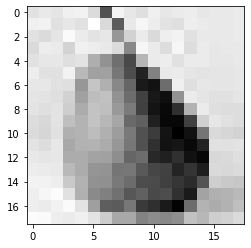

In [11]:
darken_kernel = np.array([[0, 0, 0],
                           [0, 0.5, 0],
                           [0, 0, 0]])

img_conv = conv2D(img, darken_kernel)
plt.imshow(img_conv, cmap='gray')

## Padding

### Zero Padding

<center><img src="./assets/convolution-same-zero.svg"></center>

### Mirror Padding

<center><img src="./assets/convolution-same-mirror.svg"></center>

### No Padding
<center><img src="./assets/convolution-valid.svg"></center>

> In computer vision kernels by convention are odd numbers for their dimension

## Strides

<center><img src="./assets/strides.svg"></center>



## Pooling

1. Reduce dimensionality
2. Spatial invariance

> Downsampling

### [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

```python
tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides=2
)
```

<center><img src="./assets/max-pool.svg"></center>

### [AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)

```python
tf.keras.layers.AveragePooling2D(
    pool_size = (2,2),
    strides=2
)
```

<center><img src="./assets/avg-pool.svg"></center>

## Convolution on RBG Images

<center><img src="./assets/rgb-convolution.svg"></center>

## CNN for Classification

1. **Convolution**: Apply filters to generate feature maps. `tf.keras.leyers.Conv2D`
2. **Non-linearity**: Oftern ReLU. `tf.keras.activation.*`
3. **Pooling**: Downsampling operation on each feature map. `tf.keras.layers.MaxPool2D`

<center><img src="./assets/cnn-for-classification.svg"></center>

### Feature Extraction and Convolution

<center><img src="./assets/feature-extraction-01.svg"></center>

<center><img src="./assets/feature-extraction-02.svg"></center>

<center><img src="./assets/feature-extraction-filters.svg"></center>

### Example Filter 1

<center><img src="./assets/conv-filter1-example.svg"></center>

### Example Filter 2

<center><img src="./assets/conv-filter2-example.svg"></center>

### Example Filter 3

<center><img src="./assets/conv-filter3-example.svg"></center>

### Coding images

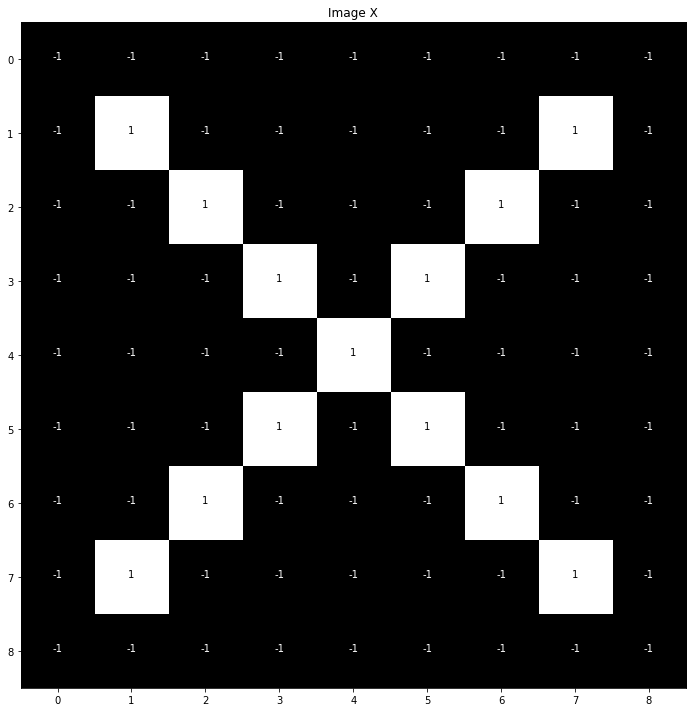

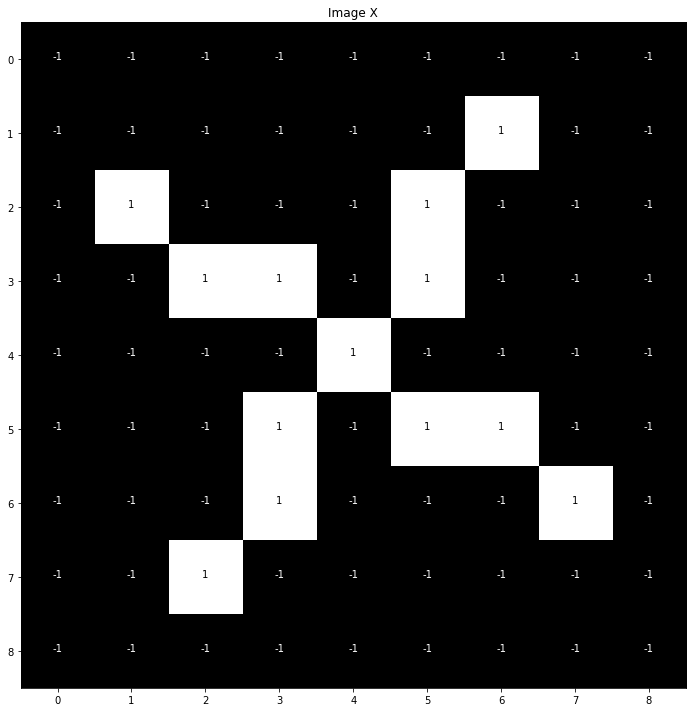

In [12]:
original_x = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                       [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                       [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                       [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                       [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                       [-1, -1, -1,  1, -1,  1, -1, -1, -1],
                       [-1, -1,  1, -1, -1, -1,  1, -1, -1],
                       [-1,  1, -1, -1, -1, -1, -1,  1, -1],
                       [-1, -1, -1, -1, -1, -1, -1, -1, -1]])

transform_x = np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1, -1,  1, -1, -1],
                       [-1,  1, -1, -1, -1,  1, -1, -1, -1],
                       [-1, -1,  1,  1, -1,  1, -1, -1, -1],
                       [-1, -1, -1, -1,  1, -1, -1, -1, -1],
                       [-1, -1, -1,  1, -1,  1,  1, -1, -1],
                       [-1, -1, -1,  1, -1, -1, -1,  1, -1],
                       [-1, -1,  1, -1, -1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1, -1, -1, -1, -1]])

showPixelValue(original_x, title = "Image X",  threshold= 0)
#plt.savefig("./assets/X_original.svg")
showPixelValue(transform_x, title = "Image X",  threshold= 0)
#plt.savefig("./assets/X_transform.svg")

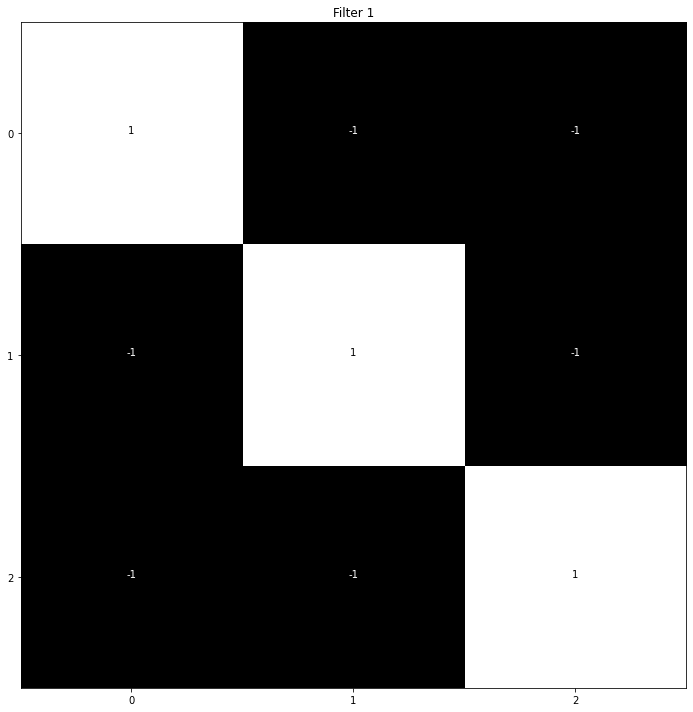

In [13]:
filter1 = np.array([[1, -1, -1],
                    [-1, 1, -1],
                    [-1, -1, 1]])

showPixelValue(filter1, title = "Filter 1", threshold= 0)
#plt.savefig("./assets/filter1.svg")

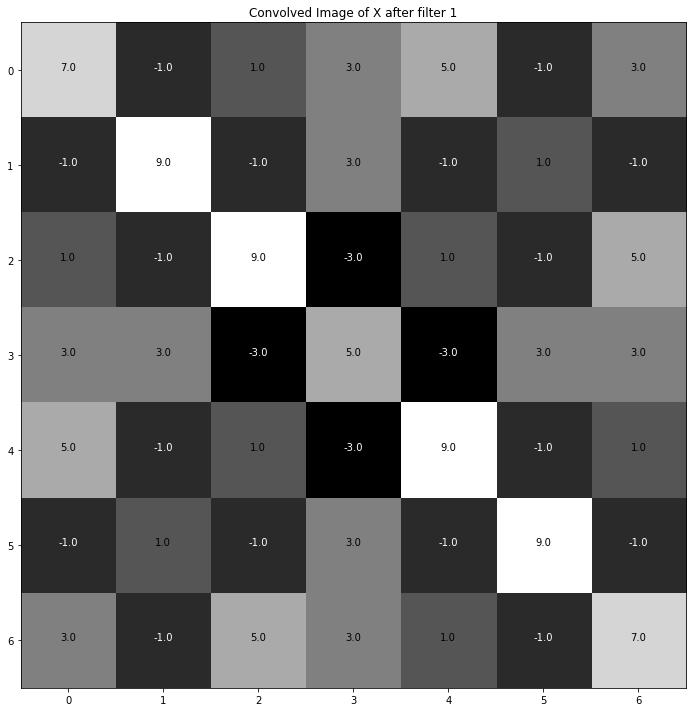

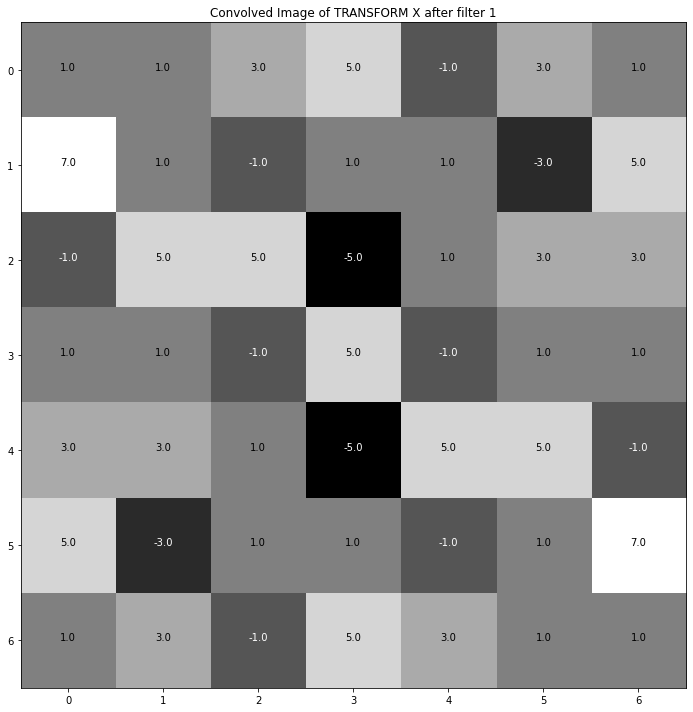

In [14]:
conv1_1 = conv2D(original_x, filter1)
showPixelValue(conv1_1, title = "Convolved Image of X after filter 1", threshold= 0)
#plt.savefig("./assets/conv-filter1-1.svg")

conv1_2 = conv2D(transform_x, filter1)
showPixelValue(conv1_2, title = "Convolved Image of TRANSFORM X after filter 1", threshold= 0)
#plt.savefig("./assets/conv-filter1-2.svg")

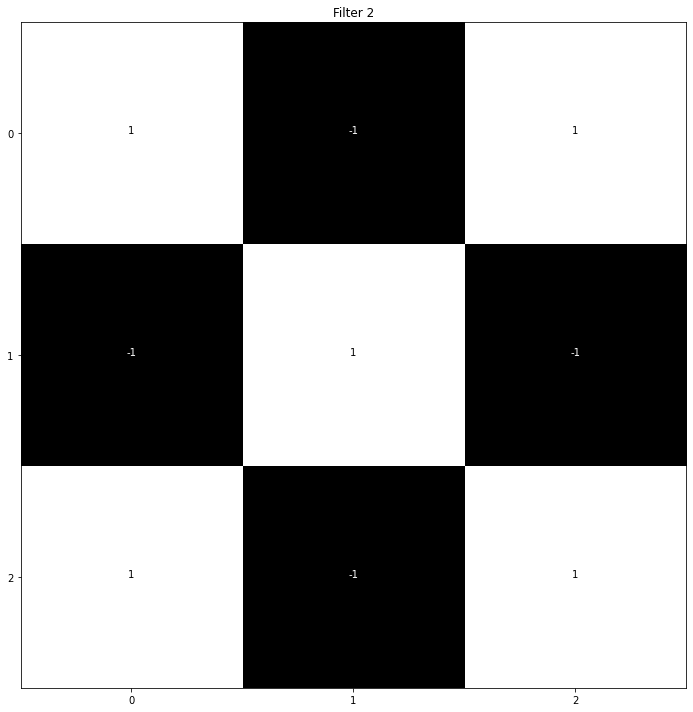

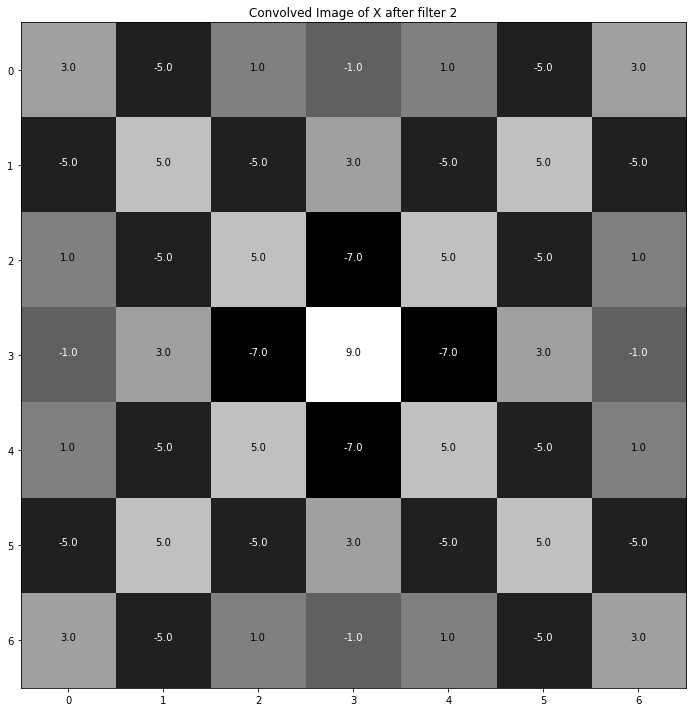

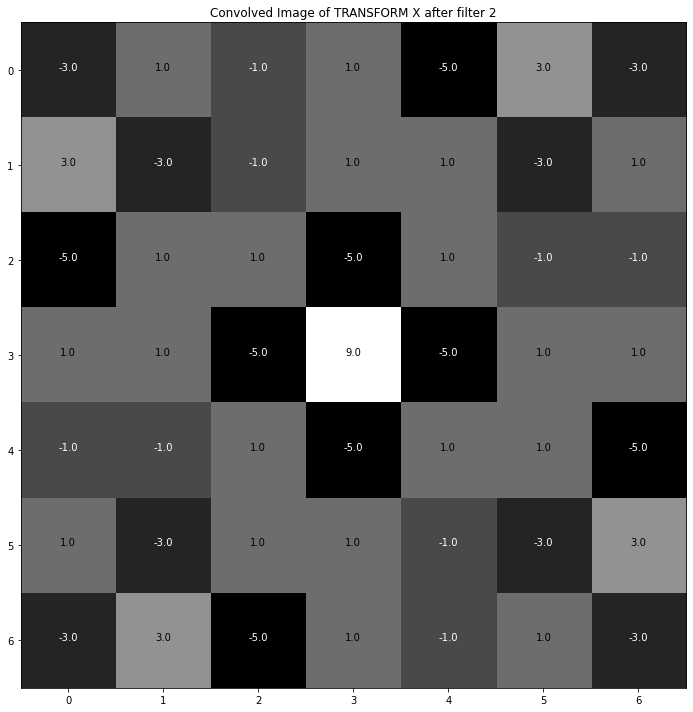

In [15]:
filter2 = np.array([[1, -1, 1],
                    [-1, 1, -1],
                    [1, -1, 1]])

showPixelValue(filter2, title = "Filter 2", threshold= 0)
#plt.savefig("./assets/filter2.svg")

conv2_1 = conv2D(original_x, filter2)
showPixelValue(conv2_1, title = "Convolved Image of X after filter 2", threshold= 0)
#plt.savefig("./assets/conv-filter2-1.svg")

conv2_2 = conv2D(transform_x, filter2)
showPixelValue(conv2_2, title = "Convolved Image of TRANSFORM X after filter 2", threshold= 0)
#plt.savefig("./assets/conv-filter2-2.svg")

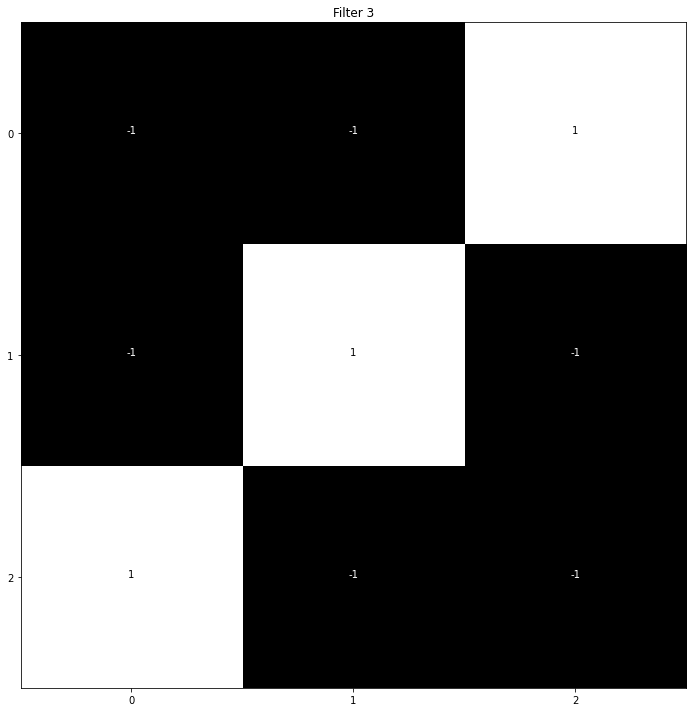

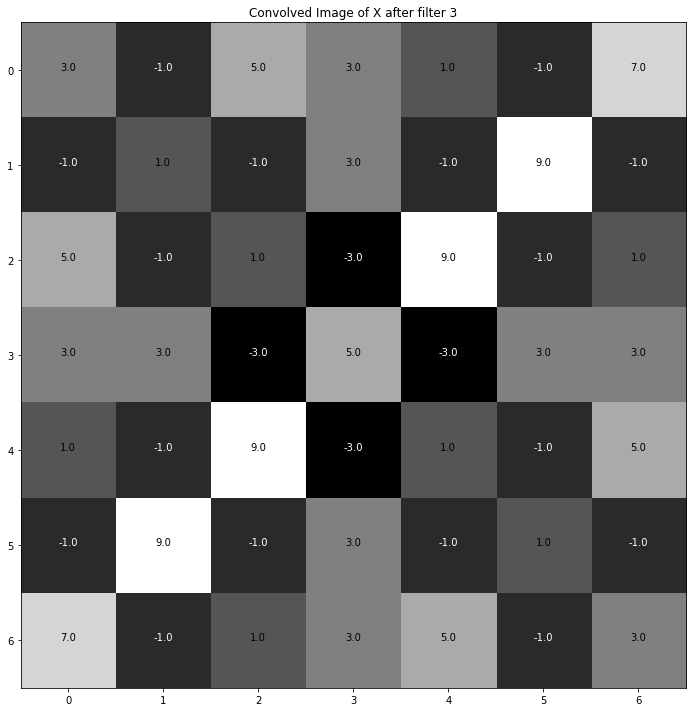

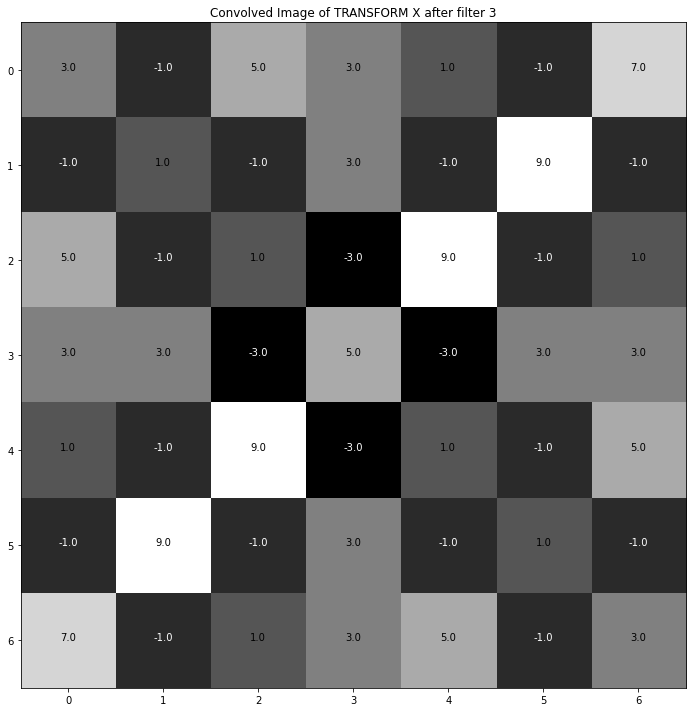

In [16]:
filter3 = np.array([[-1, -1, 1],
                    [-1, 1, -1],
                    [1, -1, -1]])

showPixelValue(filter3, title = "Filter 3", threshold= 0)
#plt.savefig("./assets/filter3.svg")

conv3_1 = conv2D(original_x, filter3)
showPixelValue(conv3_1, title = "Convolved Image of X after filter 3", threshold= 0)
#plt.savefig("./assets/conv-filter3-1.svg")

conv3_2 = conv2D(transform_x, filter3)
showPixelValue(conv3_1, title = "Convolved Image of TRANSFORM X after filter 3", threshold= 0)
#plt.savefig("./assets/conv-filter3-2.svg")

## ReLu Activation Function

<center><img src="./assets/relu1-example.svg"></center>

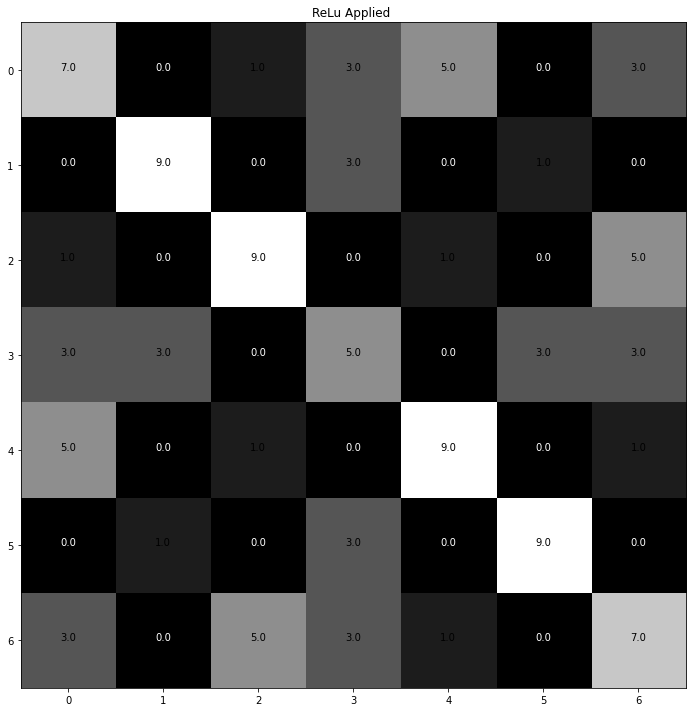

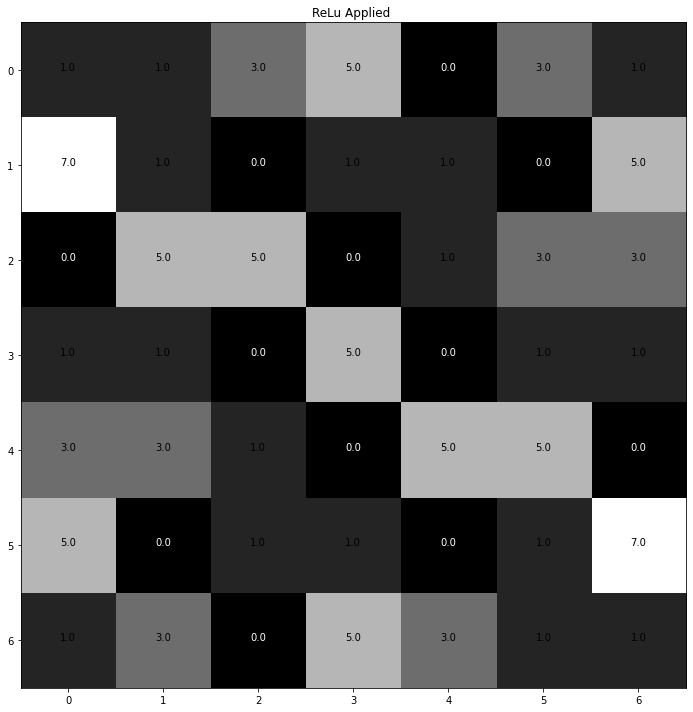

In [17]:
ReLu1_1 = np.where(conv1_1 < 0, 0, conv1_1)
showPixelValue(ReLu1_1, title = "ReLu Applied ",  threshold= 0)
#plt.savefig("./assets/relu1-1.svg")

ReLu1_2 = np.where(conv1_2 < 0, 0, conv1_2)
showPixelValue(ReLu1_2, title = "ReLu Applied ",  threshold= 0)
#plt.savefig("./assets/relu1-2.svg")

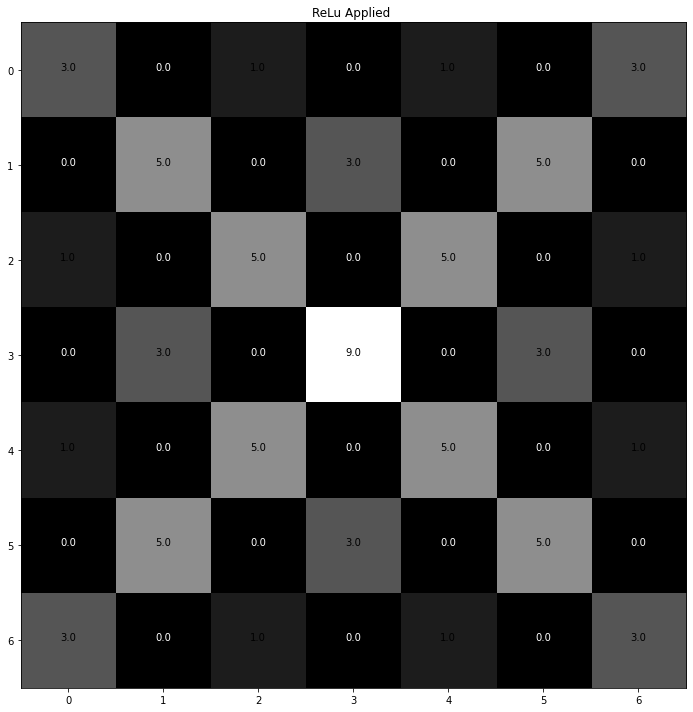

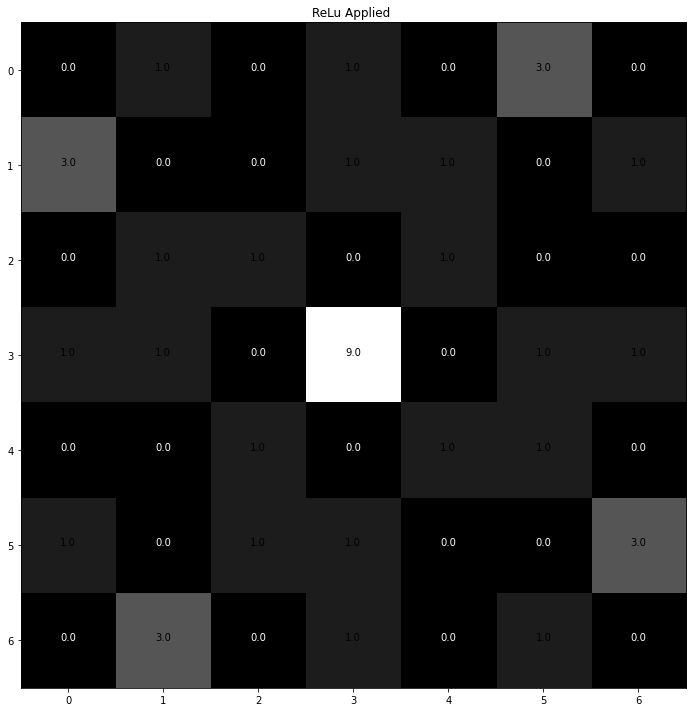

In [18]:
ReLu2_1 = np.where(conv2_1 < 0, 0, conv2_1)
showPixelValue(ReLu2_1, title = "ReLu Applied ",  threshold= 0)

ReLu2_2 = np.where(conv2_2 < 0, 0, conv2_2)
showPixelValue(ReLu2_2, title = "ReLu Applied ",  threshold= 0)

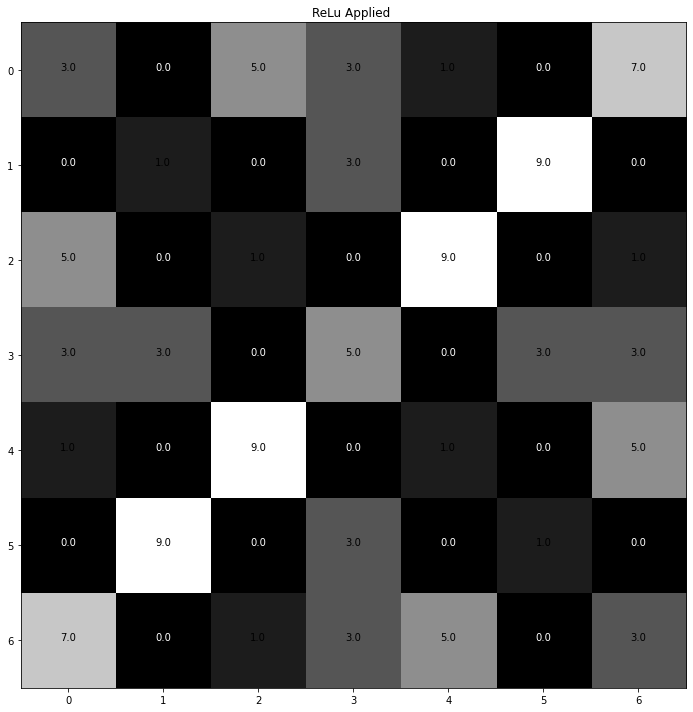

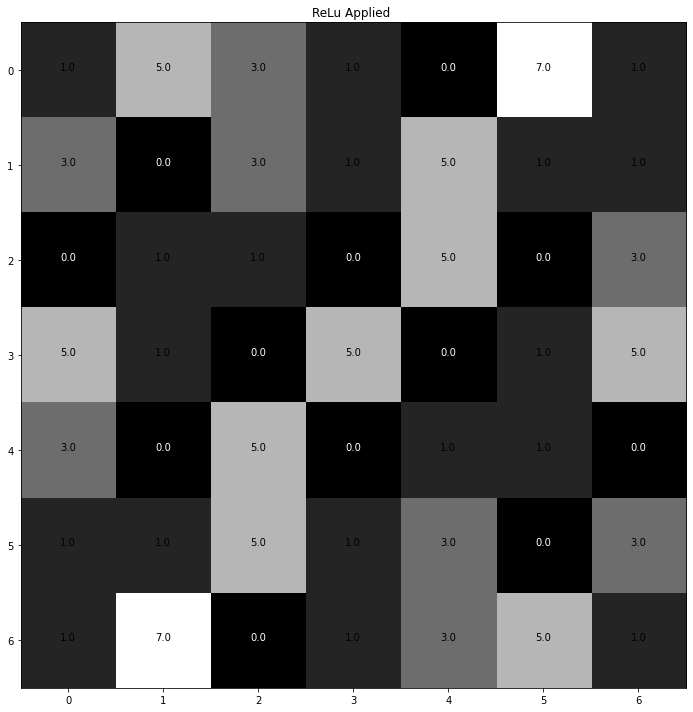

In [19]:
ReLu3_1 = np.where(conv3_1 < 0, 0, conv3_1)
showPixelValue(ReLu3_1, title = "ReLu Applied ",  threshold= 0)

ReLu3_2 = np.where(conv3_2 < 0, 0, conv3_2)
showPixelValue(ReLu3_2, title = "ReLu Applied ",  threshold= 0)

## Max Pooling

In [20]:
def maxPool(image, pool_size):
    """
    Max Pooling
    
    Default strides = 1
    """
    
    img_h, img_w = image.shape
    
    img_out_h = img_h - pool_size + 1
    img_out_w = img_w - pool_size + 1
    
    img_pooled = np.zeros((img_out_h, img_out_w))

    for x in range(img_out_h):  # Loop over every pixel of the image
        for y in range(img_out_w):
            img_pooled[y, x] = np.max(image[y:y + pool_size, x:x + pool_size])
    
    return img_pooled

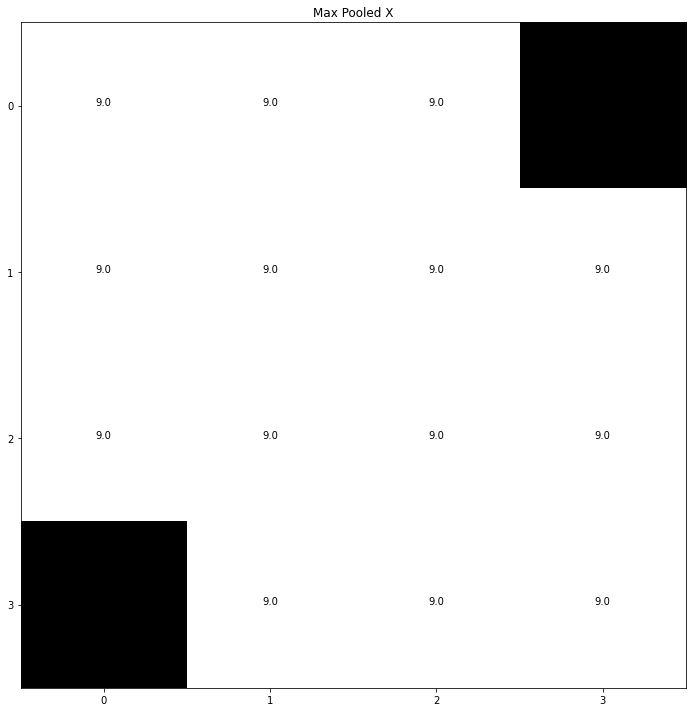

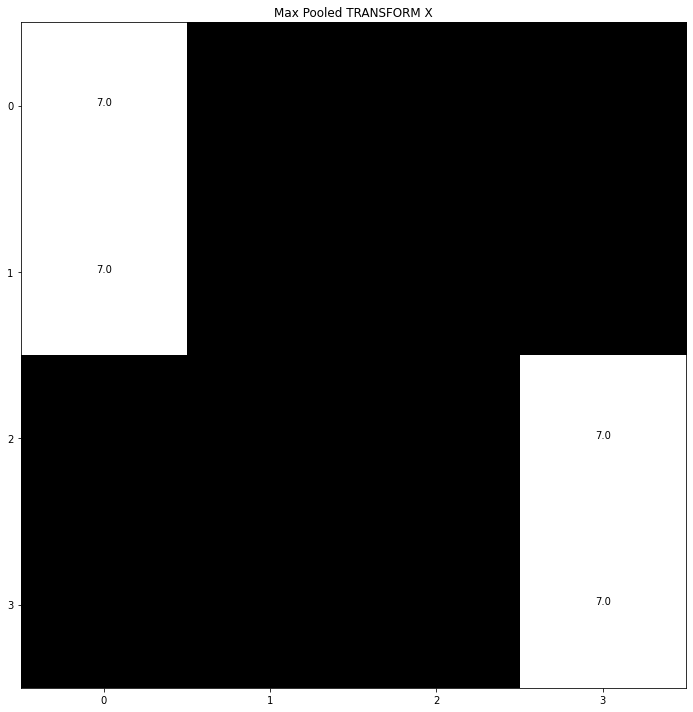

In [21]:
maxPool1_1 = maxPool(ReLu1_1, 4)
showPixelValue(maxPool1_1, title = "Max Pooled X",  threshold= 0)

maxPool1_2 = maxPool(ReLu1_2, 4)
showPixelValue(maxPool1_2, title = "Max Pooled TRANSFORM X",  threshold= 0)

### [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)


```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

<center><img src="./assets/dropout.svg"></center>

### [Flattening](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

Flattens the input. Does not affect the batch size.

```python
tf.keras.layers.Flatten(
    data_format=None, **kwargs
)
```
<center><img src="./assets/flattening.svg"></center>

### [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)




```python
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```

<center><img src="./assets/dense.svg"></center>

## Creating a More Complex Model

<center><img src="./assets/example.svg"></center>

## Coding the Model

### Loading and Preparing the Data

In [22]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("../data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("../data/asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [23]:
x_train.shape, x_valid.shape

((27455, 784), (7172, 784))

In [24]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

### Stacking Layers

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

### Summarizing the Model

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

## Compile the Model

In [27]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

## Training the Model

In [16]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 21s 24ms/step - loss: 0.3133 - accuracy: 0.9032 - val_loss: 0.8343 - val_accuracy: 0.7902
Epoch 2/20
858/858 [==============================] - 22s 25ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.2899 - val_accuracy: 0.9173
Epoch 3/20
858/858 [==============================] - 21s 25ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.3426 - val_accuracy: 0.9334
Epoch 4/20
858/858 [==============================] - 21s 24ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.2542 - val_accuracy: 0.9359
Epoch 5/20
858/858 [==============================] - 21s 24ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.2248 - val_accuracy: 0.9629
Epoch 6/20
858/858 [==============================] - 21s 24ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.2063 - val_accuracy: 0.9550
Epoch 7/20
858/858 [==============================] - 21s 24ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.2655 - val_accuracy:

## Results

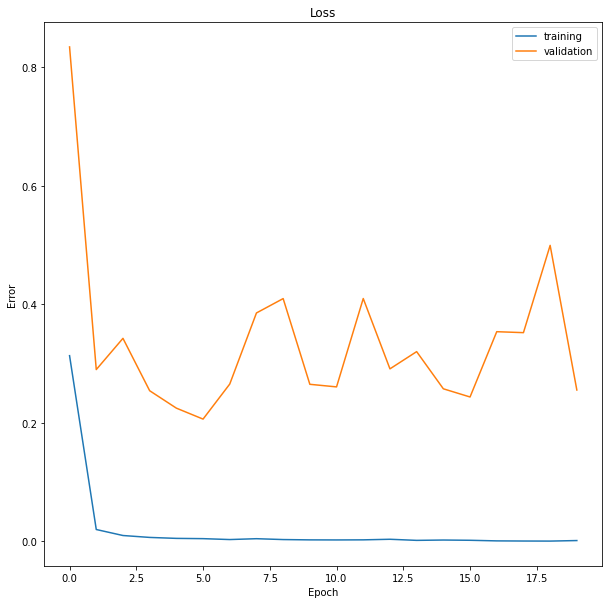

In [17]:
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

figure = plt.figure(figsize=(10, 10))
plt.title("Loss")
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

## More resources

- [Backpropagation In Convolutional Neural Networks](https://www.jefkine.com/general/2016/09/05/backpropagation-in-convolutional-neural-networks/)
- [How to correctly get layer weights from Conv2D in keras?](https://stackoverflow.com/questions/43305891/how-to-correctly-get-layer-weights-from-conv2d-in-keras)
- [Visualizing and Understanding Convolutional Networks](https://arxiv.org/abs/1311.2901)
- [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html)
- [A guide to convolution arithmetic for deep learning](https://arxiv.org/abs/1603.07285)
- [How convolutional neural networks see the world](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)
- [CNN Explainer](https://poloclub.github.io/cnn-explainer/)